In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\assignmnet1\Group09\Group09\Regression\BivariateData\9.csv") # 
data = data.sample(frac=1).reset_index(drop=True) # shuffle
data.head()


,0.53,0.04,1.7184
0,0.35,0.74,2.9055
1,0.65,0.82,4.4059
2,0.35,0.70,2.8263
3,0.76,0.31,2.9612
4,0.94,0.25,3.2161


In [3]:
# vizualising the data

data.columns = ['Feature1','Feature2', 'Target'] 
data

,Feature1,Feature2,Target
0,0.35,0.74,2.9055
1,0.65,0.82,4.4059
2,0.35,0.70,2.8263
3,0.76,0.31,2.9612
4,0.94,0.25,3.2161
...,...,...,...
10195,0.05,0.72,2.1618
10196,0.80,0.36,3.2286
10197,0.19,0.57,2.1632
10198,0.33,0.09,1.5976


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

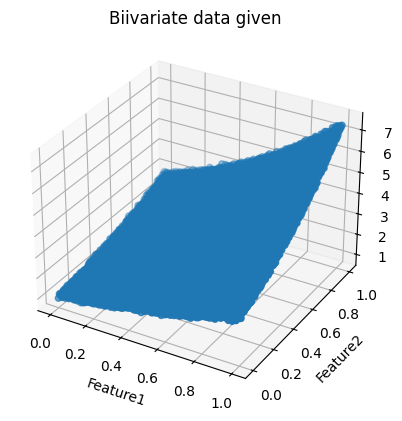

In [ ]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["Feature1"], data["Feature2"], data["Target"])


ax.set_title("Biivariate data given")
ax.set_xlabel("Feature1")
ax.set_ylabel("Feature2")
ax.set_zlabel("Target")

plt.show()


In [8]:
# initialize random weights

weights = np.random.randn(3) * 0.001 # two weights , one for feature and one for bias
weights

array([ 0.00179207,  0.00025345, -0.0010694 ])

In [9]:
# split into training and testing


f_train = data[0: int ( (data.shape[0] * 0.7) )] # 70 % training and 30 % testing
f_test = data[len(f_train):]

print(f"f_train is having shape { f_train.shape}")
print(f"f_test is having shape { f_test.shape}")

f_train is having shape (7140, 3)
f_test is having shape (3060, 3)


In [11]:
f_train = np.array(f_train) # converting into numpy arrays for my comfrotability
f_test =  np.array(f_test)

f_train_with_bias = np.insert(f_train ,2,1,axis = 1)
f_test_with_bias = np.insert(f_test ,2,1,axis = 1)

# f_test_with_bias

In [12]:
f_train_with_bias

array([[0.35  , 0.74  , 1.    , 2.9055],
       [0.65  , 0.82  , 1.    , 4.4059],
       [0.35  , 0.7   , 1.    , 2.8263],
       ...,
       [0.37  , 0.71  , 1.    , 2.9701],
       [0.47  , 0.76  , 1.    , 3.4857],
       [0.14  , 0.57  , 1.    , 1.9821]], shape=(7140, 4))

In [14]:
Epoches = 10
epoch_loss = []
eta = 1e-3
for Epoch in range(Epoches):
    avg_error = []
    
    for i in f_train_with_bias:
        
        a = np.dot(weights.T , i[0:3])
        f_a = a # representing linear activation functio
        E = (i[3] - f_a) ** 2  # we are following SGD , so we will update weights  after every error 
        avg_error.append(E)
        weights = weights - eta * (2 * (i[3] - f_a) * i[0:3])
        
        
    epoch_avg_error = np.mean(avg_error)
    print(f"Epoch no is {Epoch} | avg error is {round(epoch_avg_error , 4)} | weights are {weights}")




    


Epoch no is 0 | avg error is 1.9903385385381937e+18 | weights are [-3.22884644e+09 -3.22358171e+09 -6.01075179e+09]
Epoch no is 1 | avg error is 1.823759780118848e+37 | weights are [-9.77389640e+18 -9.75795978e+18 -1.81948775e+19]
Epoch no is 2 | avg error is 1.6711226111664827e+56 | weights are [-2.95861239e+28 -2.95378829e+28 -5.50768985e+28]
Epoch no is 3 | avg error is 1.5312602087156162e+75 | weights are [-8.95588304e+37 -8.94128021e+37 -1.66720812e+38]
Epoch no is 4 | avg error is 1.4031034055359042e+94 | weights are [-2.71099523e+47 -2.70657488e+47 -5.04673101e+47]
Epoch no is 5 | avg error is 1.2856725169380427e+113 | weights are [-8.20633222e+56 -8.19295156e+56 -1.52767334e+57]
Epoch no is 6 | avg error is 1.1780698516503557e+132 | weights are [-2.48410206e+66 -2.48005166e+66 -4.62435152e+66]
Epoch no is 7 | avg error is 1.0794728494879844e+151 | weights are [-7.51951407e+75 -7.50725329e+75 -1.39981673e+76]
Epoch no is 8 | avg error is 9.891277933556269e+169 | weights are [-2.

In [15]:
# weights are exploding 